# 6장 결정트리

## 주요 내용

- 결정트리 분류모델 작동법
- CART: 결정트리 알고리즘
- 결정트리 회귀모델 작동법

__참고:__
핵심 설명과 코드는 &#x1f511;로 표시되었으며 굳이 알아둘 필요가 없는 코드는 &#x270b;로 표시되었다.

## 기본 설정

- 필수 모듈 불러오기
- 그래프 출력 관련 기본 설정 지정

In [1]:
# 파이썬 ≥3.5 필수 (파이썬 3.7 추천)
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 6.1 결정트리 학습과 시각화 (p. 229)

`DecisionTreeClassifier` 클래스는 결정트리 알고리즘을 활용한 분류 모델을 지원한다.
아래 코드는 붓꽃 데이터의 꽃잎 길이와 꽃잎 너비 특성만을 이용한 결정트리 모델의 훈련방법을 보여준다.

- `max_depth=2`: 가지분할을 최대 2번까지만 허용하는 규제

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

__주의사항: *아래 코드는 파이썬 3.8을 사용하는 경우 필요한 모듈을 설치할 수 없기에 실행하지 말아야 한다. 이어지는 코드의 실행과는 무관한 그래프 지원 보조코드이다. 하만 다행이도 파썬 3.7 버전을 사용하는 구글 코랩에서는 잘 실행된다.*__

아래 코드는 `graphviz` 모듈의 기능을 이용하여 학습된 결정트리 분류모델의 훈련결과를 보여준다.
각각의 노드(node)에서 훈련과정에 사용된 값과 속성을 확인할 수 있다.

- 첫째줄: 노드 분할과정에 사용된 특성과 특성 임곗값
- `gini`: 노드의 지니 불순도
- `samples`: 노드에 포함된 훈련 샘플 개수
- `value`: 노드에 포함된 샘플들의 클래스 비율
- `class`: 가장 높은 비율의 클래스. 동율이면 작은 인덱스의 클래스 지정

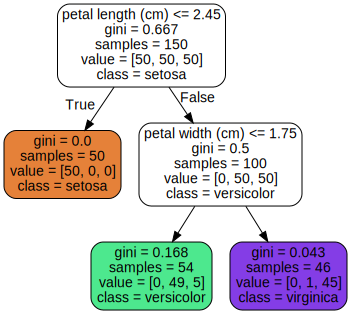

In [3]:
# 파이썬 3.8인 경우 실행하지 말것.
# 현재(2021년 5월) 구글 코랩에서는 잘 실행됨.

from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## 6.2 예측하기 (p. 231)

아래 코드는 결정트리 분류 모델의 클래스 예측결과를 그래프로 그린다.

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

아래 코드는 가지분할을 최대 3번까지 허용해서 얻어진 모델의 훈련샘플들에 대한 예측결과를 보여준다.

- 1차 분할 기준: 꽃잎 길이=2.45cm
- 2차 분할 기준: 꽃잎 너비=1.75cm
- 3차 분할 기준: (우상단) 꽃잎 길이=4.85cm, (우하단) 꽃잎 길이=4.95cm

Saving figure decision_tree_decision_boundaries_plot


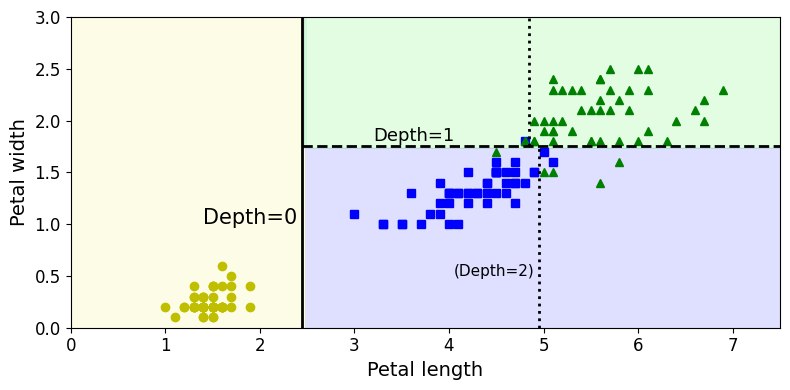

In [5]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)        # 1차 분할 기준선
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)  # 2차 분할 기준선
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)     # 3차 분할 기준선 (우하단)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)     # 3차 분할 기준선 (우상단)

plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

학습된 결정트리의 모양은 다음과 같다.

__주의사항: *아래 코드는 파이썬 3.8을 사용하는 경우 필요한 모듈을 설치할 수 없기에 실행하지 말아야 한다. 이어지는 코드의 실행과는 무관한 그래프 지원 보조코드이다.*__

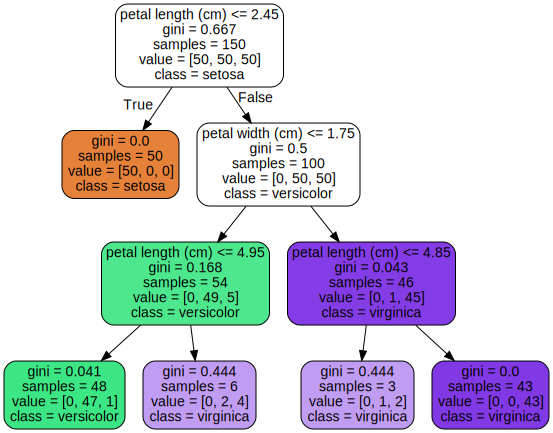

In [6]:
# 파이썬 3.8인 경우 실행하지 말것.

tree_clf_d3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_d3.fit(X, y)

export_graphviz(
        tree_clf_d3,
        out_file=os.path.join(IMAGES_PATH, "iris_tree_d3.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree_d3.dot"))

### 화이트박스 vs. 블랙박스

결정트리 모델처럼 훈련과 예측 과정은 명료하게 추적할 수 있는 모델을 화이트박스(white box) 모델이라 부른다.
반면에 앞으로 다룰 예정인 랜덤 포레스트, 신경망 등의 모델은 블랙박스(black box) 모델이라 부른다.
이유는 그런 모델들의 훈련과 예측 과정을 정확히 설명할 수 있기 때문이다.

## 6.3 클래스 확률 추정 (p. 234)

입력 샘플의 클래스 확률은 샘플이 속한 리프 노드(leaf node)의 클래스 비율을 사용하며,
가장 높은 비율의 클래스를 예측값으로 사용한다.
따라서 노드에 속한 모든 샘플의 클래스 확률은 동일하다.

아래 코드는 꽃잎 길이와 너비가 각각 5cm, 1.5cm인 붗꽃의 품종별 확률과 예측값을 보여준다.

- `maximal_depth=2`인 경우 예측값: 버시컬러

In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

- `maximal_depth=3`인 경우 예측값: 버지니카

In [9]:
tree_clf_d3.predict_proba([[5, 1.5]])

array([[0.        , 0.33333333, 0.66666667]])

In [10]:
tree_clf_d3.predict([[5, 1.5]])

array([2])

## 6.7 규제 매개변수 (p. 237)

결정트리 모델의 규제는 기본적으로 분할을 제한하는 다양한 방식으로 이루어진다.
아래 코드는 `min_samples_leaf=4` 규제를 사용하는 모델(아래 그림 오른편)과
어느 규제도 사용하지 않은 모델(아래 그림 왼편)의 차이를 보여준다.
사용되는 훈련세트는 moons 데이터셋이다.

- 왼편 결정트리: 과대적합 발생
- 오른편 결정트리: `min_samples_leaf=4` 규제 사용. 즉, 리프노드에 최소 4개 이상의 샘플이 포함되어 있어야 함.

Saving figure min_samples_leaf_plot


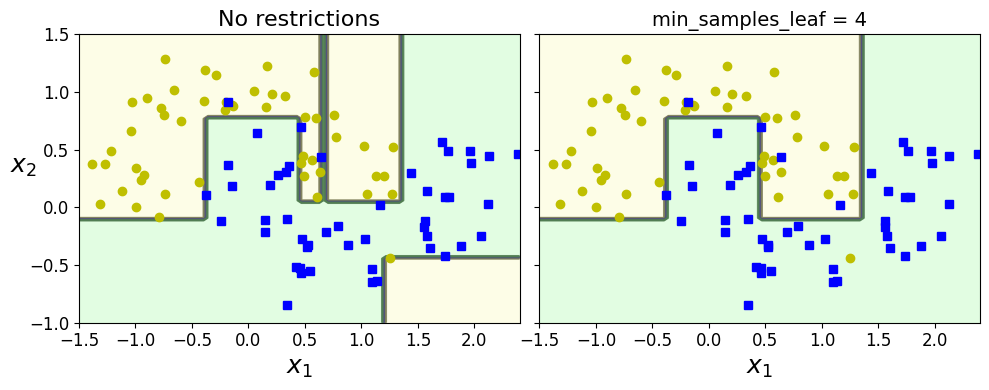

In [11]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)  # 규제 없음
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)  # 규제 사용
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

## 6.8 회귀 (p. 239)

결정트리 회귀모델 알고리즘은 분류모델과 거의 동일한 알고리즘을 사용한다.
아래 코드는 2차 다항식을 이용하여 생성된 훈련 세트에 대한 결정트리 회귀모델 훈련을 보여준다.

In [12]:
# 2차 다항식 훈련세트 + 잡음
np.random.seed(42)

m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

아래 코드는 `max_depth`를 2 또는 3으로 지정하고 결정트리 회귀모델을 훈련시킨 결과를 보여준다.

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)  # max_depth=2
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)  # max_depth=3
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

아래 함수는 훈련세트와 노드별 예측값(빨강 직선)을 그린다.

In [14]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

- 왼편 그림: `max_depth=2`인 경우
- 오른편 그림: `max_depth=3`인 경우

Saving figure tree_regression_plot


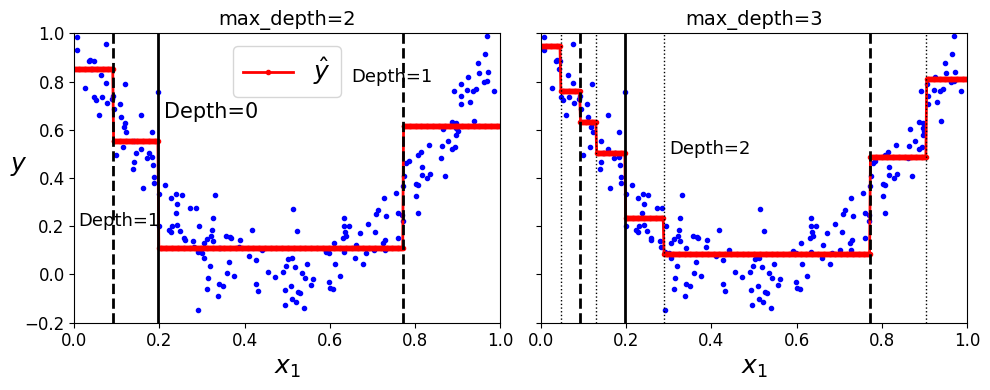

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼편 그림
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

# 오른편 그림
plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

왼편 그래프에 해당하는 결정트리 회귀모델은 다음과 같다.

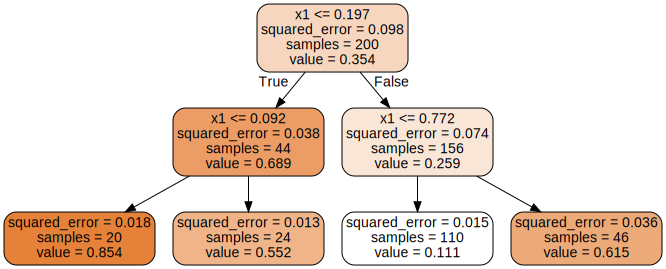

In [16]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

### 회귀모델 규제

결정트리 회귀모델의 규제는
CART 알고리즘이 노드 분할에 사용하는 기준(`criterion`) 하이퍼파라미터에 사용되는 값을 제외하고
분류모델의 경우와 완전히 동일하다.

- 분류모델의 비용함수 기준: 지니 불순도(`gini`) 또는 엔트로피(`entropy`)
- 회귀모델의 비용함수 기준: 평균제곱오차(`mse`), 프리드먼 평균제곱오차(`friedman_mse`),
    평균절대오차(`mae`), 쁘와송(`poisson`)

아래 코드는 `min_samples_leaf=10` 규제를 사용하는 회귀모델(아래 그림 오른편)과
어느 규제도 사용하지 않은 회귀모델(아래 그림 왼편)의 차이를 보여준다.

- 왼편 결정트리: 과대적합 발생
- 오른편 결정트리: `min_samples_leaf=10` 규제 사용. 즉, 리프노드에 최소 10개 이상의 샘플이 포함되어 있어야 함.

In [17]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

Saving figure tree_regression_regularization_plot


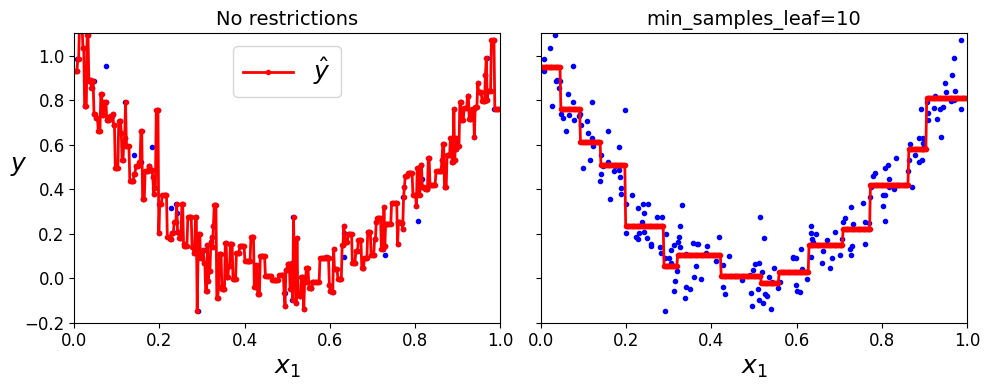

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# 왼편 그림
plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

# 오른편 그림
plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()

## 6.9 불안정성 (p. 241)

결정트리 모델의 훈련과 사용은 매우 쉽고, 성능도 강력하다.
하지만 x, y 등의 축(axis)에 수직인 결정경계만 사용하기 때문에 회전, 샘플 삭제/추가 등 훈련세트의 작은 변화에
매우 민감하다.

### 회전 민감도 예제 1

아래 코드는 결정트리 모델의 회전 민감도를 보여준다.
두 개의 특성을 가지며, 임의로 생성된 100개의 훈련 샘플을 시계방향으로 45도 회전시킨 후
훈련시킨 모델의 결정경계가 직선에서 계단식으로 변화되는 것을 볼 수 있다.
결국 일반화 성능이 보다 약한 모델이 생성되었다.

- 두 개의 특성을 갖는 100개의 훈련 샘플 생성. 둘째 특성값의 부호에 따라 두 클래스로 분류.

In [19]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

- 시계방향으로 45도 회전시키기

In [20]:
angle = np.pi / 4  # 회전 각도 45

# 훈련 세트 회전시키기
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

* 결정트리 모델 비교

Saving figure sensitivity_to_rotation_plot


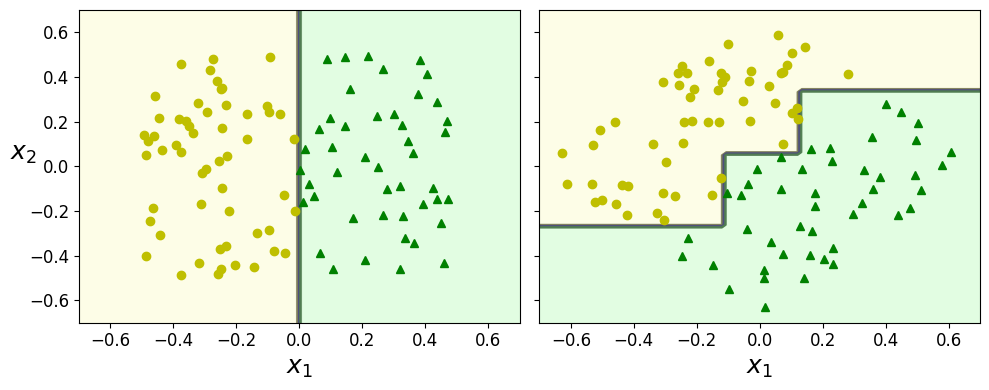

In [21]:
# 왼편 그래프 모델
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)

# 오른편 그래프 모델
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

# 그래프 그리기
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
# 왼편 그래프
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

# 오른편 그래프
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

### 회전 민감도 예제 2

아래 코드는 붗꽃 데이터를 시계방향으로 20도 회전한 후에 훈련시키면 분류 모델의 결정경계가
이전과 많이 다름을 잘 보여준다.

In [22]:
# 붓꽃 데이터 다시 불러오기
iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

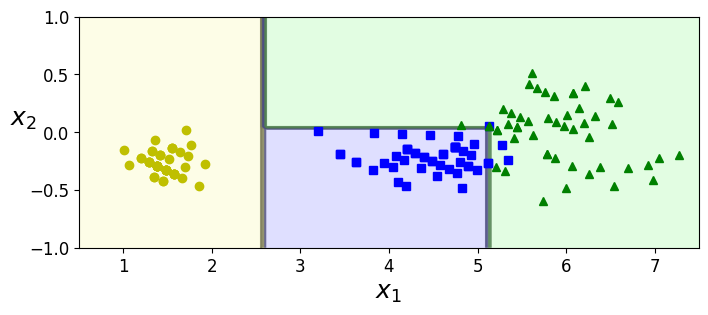

In [23]:
# 시계방향으로 20도 회전
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

### 샘플 민감도 예제

아래 코드는 훈련세트에 포함된 버시컬러 품종 중에서 가장 넓은 꽃잎을 가진
샘플을 삭제한 후에 훈련시킨 결정트리 분류모델의 결정경계를 보여준다.
이전과 많이 다름에 주의하라.

- 버시컬러 샘플 중 가장 넓은 꽃잎 너비 확인: 1.8cm

In [24]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 가장 넓은 꽃잎을 갖는 버시컬러 샘플의 특성 확인

array([[4.8, 1.8]])

- 가장 넓은 버시컬러 샘플 제거 후 훈련

In [25]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)  # y==2는 버지니카 품종은 그대로 둠.

X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

결정경계 기준값으로 꽃잎의 길이는 전혀 사용되지 않는다.

Saving figure decision_tree_instability_plot


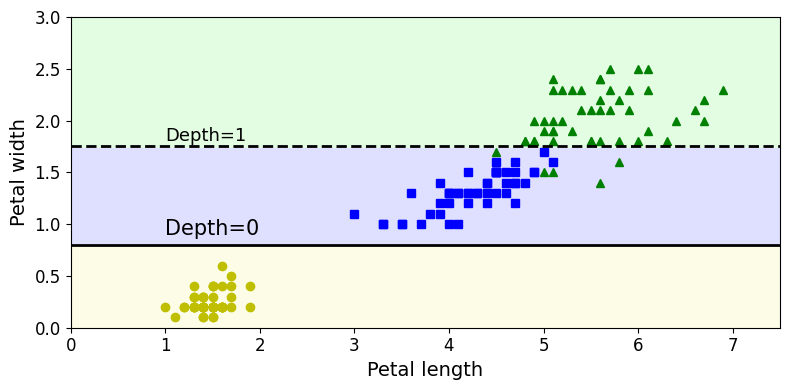

In [26]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

## 연습문제 해답

## 1. to 6.

책 부록 A 참조.

## 7.

_Exercise: train and fine-tune a Decision Tree for the moons dataset._

a. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

Adding `random_state=42` to make this notebook's output constant:

In [27]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. Split it into a training set and a test set using `train_test_split()`.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.

In [29]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [30]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

d. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

By default, `GridSearchCV` trains the best model found on the whole training set (you can change this by setting `refit=False`), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [31]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

## 8.

_Exercise: Grow a forest._

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's `ShuffleSplit` class for this.

In [32]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [33]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)

    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

np.float64(0.805471)

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode()` function for this). This gives you _majority-vote predictions_ over the test set.

In [34]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [35]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [36]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872